In [ ]:
import pandas as pd
import re 

# Base Data

In [173]:
df = pd.read_csv("./school_data.csv")

df.columns = df.columns.str.replace("\n", " ", regex=False).str.upper().str.replace(" ", "_")

df = df[df["CAMPUS_NUMBER"].notna()]

df["ST_SCHID"] = (
    "TX-"
    + df["DISTRICT_NUMBER"].astype(int).astype(str).str.zfill(6)
    + "-"
    + df["CAMPUS_NUMBER"].astype(int).astype(str).str.zfill(9)
)

df.head()


,DISTRICT_NUMBER,DISTRICT,CAMPUS_NUMBER,CAMPUS,REGION,COUNTY,SCHOOL_TYPE,GRADES_SERVED,ALTERNATIVE_EDUCATION_ACCOUNTABILITY,CHARTER,...,DISTINCTION_CLOSING_THE_GAPS,DISTINCTION_POSTSECONDARY_READINESS,US_CONGRESS_DISTRICT,US_CONGRESS_ELECTION_DISTRICT,TX_HOUSE_DISTRICT,TX_HOUSE_ELECTION_DISTRICT,TX_SENATE_DISTRICT,TX_SENATE_ELECTION_DISTRICT,CAMPUS_ENROLLMENT_TYPE,ST_SCHID
1,1902,CAYUGA ISD,1902001.0,CAYUGA H S,REGION 07: KILGORE,ANDERSON,High School,09 - 12,No,No,...,Earned,Earned,6.0,6.0,8.0,8.0,3.0,3.0,ZONED SCHOOL-TRANSFERS ACCEPTED,TX-001902-001902001
2,1902,CAYUGA ISD,1902041.0,CAYUGA MIDDLE,REGION 07: KILGORE,ANDERSON,Middle School,06 - 08,No,No,...,Not Earned,Earned,6.0,6.0,8.0,8.0,3.0,3.0,ZONED SCHOOL-TRANSFERS ACCEPTED,TX-001902-001902041
3,1902,CAYUGA ISD,1902103.0,CAYUGA EL,REGION 07: KILGORE,ANDERSON,Elementary,PK - 05,No,No,...,Not Earned,Not Earned,6.0,6.0,8.0,8.0,3.0,3.0,ZONED SCHOOL-TRANSFERS ACCEPTED,TX-001902-001902103
5,1903,ELKHART ISD,1903001.0,ELKHART H S,REGION 07: KILGORE,ANDERSON,High School,09 - 12,No,No,...,Not Earned,Not Earned,6.0,6.0,8.0,8.0,3.0,3.0,ZONED SCHOOL-TRANSFERS ACCEPTED,TX-001903-001903001
6,1903,ELKHART ISD,1903041.0,ELKHART MIDDLE,REGION 07: KILGORE,ANDERSON,Middle School,06 - 08,No,No,...,Not Earned,Earned,6.0,6.0,8.0,8.0,3.0,3.0,ZONED SCHOOL-TRANSFERS ACCEPTED,TX-001903-001903041


# Lunch Data

In [174]:
lunch_data = pd.read_csv("./lunch.csv", low_memory=False)
lunch_data = lunch_data[lunch_data["ST"] == "TX"]
print(lunch_data.columns)
lunch_data.head()

Index(['SCHOOL_YEAR', 'FIPST', 'STATENAME', 'ST', 'SCH_NAME',
       'STATE_AGENCY_NO', 'UNION', 'ST_LEAID', 'LEAID', 'ST_SCHID', 'NCESSCH',
       'SCHID', 'DATA_GROUP', 'LUNCH_PROGRAM', 'STUDENT_COUNT',
       'TOTAL_INDICATOR', 'DMS_FLAG'],
      dtype='object')


,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,DATA_GROUP,LUNCH_PROGRAM,STUDENT_COUNT,TOTAL_INDICATOR,DMS_FLAG
380515,2022-2023,48,TEXAS,TX,A & M CONS H S,1,NaN,TX-021901,4807350,TX-021901-021901001,480735000001,4800001,Free and Reduced-price Lunch Table,Free lunch qualified,577.0,Category Set A,Reported
380516,2022-2023,48,TEXAS,TX,A & M CONS H S,1,NaN,TX-021901,4807350,TX-021901-021901001,480735000001,4800001,Free and Reduced-price Lunch Table,Reduced-price lunch qualified,115.0,Category Set A,Reported
380517,2022-2023,48,TEXAS,TX,A & M CONS H S,1,NaN,TX-021901,4807350,TX-021901-021901001,480735000001,4800001,Free and Reduced-price Lunch Table,Missing,0.0,Category Set A,Reported
380518,2022-2023,48,TEXAS,TX,A & M CONS H S,1,NaN,TX-021901,4807350,TX-021901-021901001,480735000001,4800001,Free and Reduced-price Lunch Table,No Category Codes,692.0,Education Unit Total,Reported
380519,2022-2023,48,TEXAS,TX,A & M CONS H S,1,NaN,TX-021901,4807350,TX-021901-021901001,480735000001,4800001,Direct Certification,Not Applicable,NaN,Education Unit Total,Not reported


In [175]:
wide_df = lunch_data.pivot_table(
    index="ST_SCHID",             
    columns="LUNCH_PROGRAM",     
    values="STUDENT_COUNT",     
    aggfunc="sum",             
    fill_value=0              
).reset_index()

lunch_df = wide_df[["ST_SCHID", "Free lunch qualified", "Reduced-price lunch qualified"]]

lunch_df.columns = [
    col if col == "ST_SCHID" else col.replace("\n", "_").upper() + "_COUNT"
    for col in lunch_df.columns
]

lunch_df.head()

,ST_SCHID,FREE LUNCH QUALIFIED_COUNT,REDUCED-PRICE LUNCH QUALIFIED_COUNT
0,TX-001902-001902001,64.0,12.0
1,TX-001902-001902041,63.0,15.0
2,TX-001902-001902103,120.0,21.0
3,TX-001903-001903001,120.0,28.0
4,TX-001903-001903041,133.0,21.0


# Census Data

In [176]:
census = pd.read_csv("./census.csv")
census = census[census["ST"] == "TX"]
census.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,GRADE,RACE_ETHNICITY,SEX,STUDENT_COUNT,TOTAL_INDICATOR,DMS_FLAG
9107366,2022-2023,48,TEXAS,TX,CROSBYTON CISD PRE K-12,1,NaN,TX-054901,4800001,TX-054901-054901001,480000101146,4801146,Grade 1,American Indian or Alaska Native,Female,0.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
9107367,2022-2023,48,TEXAS,TX,CROSBYTON CISD PRE K-12,1,NaN,TX-054901,4800001,TX-054901-054901001,480000101146,4801146,Grade 1,American Indian or Alaska Native,Male,0.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
9107368,2022-2023,48,TEXAS,TX,CROSBYTON CISD PRE K-12,1,NaN,TX-054901,4800001,TX-054901-054901001,480000101146,4801146,Grade 1,Asian,Female,0.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
9107369,2022-2023,48,TEXAS,TX,CROSBYTON CISD PRE K-12,1,NaN,TX-054901,4800001,TX-054901-054901001,480000101146,4801146,Grade 1,Asian,Male,0.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
9107370,2022-2023,48,TEXAS,TX,CROSBYTON CISD PRE K-12,1,NaN,TX-054901,4800001,TX-054901-054901001,480000101146,4801146,Grade 1,Black or African American,Female,0.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported


In [177]:
ethnicity = census.groupby(by=["ST_SCHID", "RACE_ETHNICITY"])["STUDENT_COUNT"].sum().unstack(fill_value=0).reset_index()
ethnicity.columns = [
    col if col == "ST_SCHID" else "RACE_" + re.sub(r"\s+", "_", col)
    for col in ethnicity.columns
]
ethnicity.head()

,ST_SCHID,RACE_American_Indian_or_Alaska_Native,RACE_Asian,RACE_Black_or_African_American,RACE_Hispanic/Latino,RACE_Native_Hawaiian_or_Other_Pacific_Islander,RACE_No_Category_Codes,RACE_Not_Specified,RACE_Two_or_more_races,RACE_White
0,TX-001902-001902001,0.0,2.0,12.0,36.0,0.0,513.0,0.0,16.0,276.0
1,TX-001902-001902041,0.0,2.0,16.0,32.0,0.0,498.0,0.0,18.0,264.0
2,TX-001902-001902103,0.0,2.0,28.0,44.0,0.0,771.0,0.0,20.0,420.0
3,TX-001903-001903001,0.0,6.0,24.0,76.0,2.0,945.0,0.0,20.0,502.0
4,TX-001903-001903041,2.0,0.0,18.0,62.0,0.0,810.0,0.0,16.0,442.0


# Staff Counts

In [178]:
staff = pd.read_csv("./staff.csv")
staff = staff[staff["ST"] == "TX"]
staff = staff[["ST_SCHID", "TEACHERS"]]
staff = staff.rename(columns={"TEACHERS": "TEACHERS_COUNT"})
staff.head()

,ST_SCHID,TEACHERS_COUNT
80861,TX-054901-054901001,32.05
80862,TX-054901-054901200,NaN
80863,TX-063903-063903001,24.24
80864,TX-069901-069901001,20.37
80865,TX-015801-015801001,6.17


In [179]:
school = pd.read_csv("./school.csv")
print(school.columns)
school.head()
school["NSLP_STATUS_TEXT"].unique()

Index(['SCHOOL_YEAR', 'FIPST', 'STATENAME', 'ST', 'SCH_NAME',
       'STATE_AGENCY_NO', 'UNION', 'ST_LEAID', 'LEAID', 'ST_SCHID', 'NCESSCH',
       'SCHID', 'SHARED_TIME', 'NSLP_STATUS', 'NSLP_STATUS_TEXT', 'VIRTUAL',
       'VIRTUAL_TEXT'],
      dtype='object')


array(['Yes participating without using any Provision or the CEO',
       'Yes under Community Eligibility Option (CEO)', 'No',
       'Yes under Provision 2', 'Yes under Provision 3', 'Not reported',
       'Missing', 'Yes under Provision 1'], dtype=object)

# Locale Data

In [180]:
locale = pd.read_csv("./locale.csv", encoding='latin-1')
locale = locale[locale["LSTATE05"] == 'TX']
locale["ST_SCHID"] = (
    locale["LSTATE05"] + "-" +
    locale["LEAID"].astype(str).str.zfill(6) + "-" +
    locale["NCESSCH"].astype(str).str.zfill(9)  # or 9 depending on your convention
)

locale_map = {
    11: 'Urban', 12: 'Urban', 13: 'Urban',
    21: 'Suburban', 22: 'Suburban', 23: 'Suburban',
    31: 'Rural', 32: 'Rural', 33: 'Rural',
    41: 'Rural', 42: 'Rural', 43: 'Rural'
}

for k, v in locale_map.items():
    locale_map[int(k)] = v

locale['ULOCALE'] = pd.to_numeric(locale['ULOCALE'], errors='coerce').astype("Int64")
locale['URBANICITY'] = locale['ULOCALE'].apply(lambda x: locale_map.get(x))

locale["CAMPUS"] = locale["SCHNAM05"]
locale = locale[["CAMPUS", "URBANICITY", "LATCOD", "LONCOD"]]

locale = locale.rename(columns={"LATCOD": "LAT", "LONCOD": "LONG"})
locale.head()

,CAMPUS,URBANICITY,LAT,LONG
14671,CROSBYTON EL,Rural,33.65878,-101.24680
14672,CROSBYTON H S,Rural,33.65878,-101.24680
14673,CROSBYTON MIDDLE,Rural,33.65878,-101.24680
14674,SP ED CO-OP,Rural,33.65878,-101.24680
14675,SPUR SCHOOL,Rural,33.48355,-100.85904


# Dataset Construction

In [181]:
df = df.merge(lunch_df, how='left', on='ST_SCHID')
df = df.merge(ethnicity, how='left', on='ST_SCHID')
df = df.merge(staff, how='left', on='ST_SCHID')
df = df.merge(locale, how = 'left', on="CAMPUS")
df.columns = df.columns.str.replace(r"\s+", "_", regex=True).str.upper()
df.head()

,DISTRICT_NUMBER,DISTRICT,CAMPUS_NUMBER,CAMPUS,REGION,COUNTY,SCHOOL_TYPE,GRADES_SERVED,ALTERNATIVE_EDUCATION_ACCOUNTABILITY,CHARTER,...,RACE_HISPANIC/LATINO,RACE_NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER,RACE_NO_CATEGORY_CODES,RACE_NOT_SPECIFIED,RACE_TWO_OR_MORE_RACES,RACE_WHITE,TEACHERS_COUNT,URBANICITY,LAT,LONG
0,1902,CAYUGA ISD,1902001.0,CAYUGA H S,REGION 07: KILGORE,ANDERSON,High School,09 - 12,No,No,...,36.0,0.0,513.0,0.0,16.0,276.0,19.34,Rural,31.9569,-95.9744
1,1902,CAYUGA ISD,1902041.0,CAYUGA MIDDLE,REGION 07: KILGORE,ANDERSON,Middle School,06 - 08,No,No,...,32.0,0.0,498.0,0.0,18.0,264.0,11.20,Rural,31.9569,-95.9744
2,1902,CAYUGA ISD,1902103.0,CAYUGA EL,REGION 07: KILGORE,ANDERSON,Elementary,PK - 05,No,No,...,44.0,0.0,771.0,0.0,20.0,420.0,17.86,Rural,31.9569,-95.9744
3,1903,ELKHART ISD,1903001.0,ELKHART H S,REGION 07: KILGORE,ANDERSON,High School,09 - 12,No,No,...,76.0,2.0,945.0,0.0,20.0,502.0,35.72,Rural,31.6275,-95.5785
4,1903,ELKHART ISD,1903041.0,ELKHART MIDDLE,REGION 07: KILGORE,ANDERSON,Middle School,06 - 08,No,No,...,62.0,0.0,810.0,0.0,16.0,442.0,23.82,Rural,31.6279,-95.5780


In [182]:
relevant_columns = [
    # School identification
    'DISTRICT_NUMBER',
    'DISTRICT', 
    'CAMPUS_NUMBER',
    'CAMPUS',
    'REGION',
    'COUNTY',
    
    # School characteristics
    'SCHOOL_TYPE',
    'GRADES_SERVED',
    'CHARTER',
    'URBANICITY',
    'NUMBER_OF_STUDENTS',
    
    # Performance outcomes (our dependent variables)
    'OVERALL_RATING',
    'OVERALL_SCORE',
    
    # Socioeconomic variables
    '%_ECONOMICALLY_DISADVANTAGED',
    '%_EB/EL_STUDENTS',
    'FREE_LUNCH_QUALIFIED_COUNT',
    'REDUCED-PRICE_LUNCH_QUALIFIED_COUNT',
    
    # Race/ethnicity variables
    'RACE_AMERICAN_INDIAN_OR_ALASKA_NATIVE',
    'RACE_ASIAN', 
    'RACE_BLACK_OR_AFRICAN_AMERICAN',
    'RACE_HISPANIC/LATINO',
    'RACE_NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER',
    'RACE_TWO_OR_MORE_RACES',
    'RACE_WHITE',
    
    # Teacher resources
    'TEACHERS_COUNT',

    # GEO
    "LAT",
    "LONG"
]

# Create the focused dataset
df_analysis = df[relevant_columns].copy()
df_analysis.head()

,DISTRICT_NUMBER,DISTRICT,CAMPUS_NUMBER,CAMPUS,REGION,COUNTY,SCHOOL_TYPE,GRADES_SERVED,CHARTER,URBANICITY,...,RACE_AMERICAN_INDIAN_OR_ALASKA_NATIVE,RACE_ASIAN,RACE_BLACK_OR_AFRICAN_AMERICAN,RACE_HISPANIC/LATINO,RACE_NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER,RACE_TWO_OR_MORE_RACES,RACE_WHITE,TEACHERS_COUNT,LAT,LONG
0,1902,CAYUGA ISD,1902001.0,CAYUGA H S,REGION 07: KILGORE,ANDERSON,High School,09 - 12,No,Rural,...,0.0,2.0,12.0,36.0,0.0,16.0,276.0,19.34,31.9569,-95.9744
1,1902,CAYUGA ISD,1902041.0,CAYUGA MIDDLE,REGION 07: KILGORE,ANDERSON,Middle School,06 - 08,No,Rural,...,0.0,2.0,16.0,32.0,0.0,18.0,264.0,11.20,31.9569,-95.9744
2,1902,CAYUGA ISD,1902103.0,CAYUGA EL,REGION 07: KILGORE,ANDERSON,Elementary,PK - 05,No,Rural,...,0.0,2.0,28.0,44.0,0.0,20.0,420.0,17.86,31.9569,-95.9744
3,1903,ELKHART ISD,1903001.0,ELKHART H S,REGION 07: KILGORE,ANDERSON,High School,09 - 12,No,Rural,...,0.0,6.0,24.0,76.0,2.0,20.0,502.0,35.72,31.6275,-95.5785
4,1903,ELKHART ISD,1903041.0,ELKHART MIDDLE,REGION 07: KILGORE,ANDERSON,Middle School,06 - 08,No,Rural,...,2.0,0.0,18.0,62.0,0.0,16.0,442.0,23.82,31.6279,-95.5780


In [185]:
# Method 2: Fast multithreaded batch processing
from concurrent.futures import ThreadPoolExecutor, as_completed
from threading import Lock
import threading

def get_census_income_by_coordinates(lat, lon, year=2022):
    """
    Get median household income from US Census API using lat/long
    Returns census tract level data - FAST VERSION
    """
    try:
        # First, get the census tract for the coordinates
        geocode_url = f"https://geocoding.geo.census.gov/geocoder/geographies/coordinates"
        params = {
            'x': lon,
            'y': lat,
            'benchmark': 'Public_AR_Current',
            'vintage': 'Current_Current',
            'format': 'json'
        }
        
        response = requests.get(geocode_url, params=params, timeout=10)
        if response.status_code == 200:
            data = response.json()
            
            # Extract census tract information
            if 'result' in data and 'geographies' in data['result']:
                tract_info = data['result']['geographies']['Census Tracts'][0]
                state_code = tract_info['STATE']
                county_code = tract_info['COUNTY'] 
                tract_code = tract_info['TRACT']
                
                # Now get income data from American Community Survey (ACS)
                acs_url = "https://api.census.gov/data/2022/acs/acs5"
                acs_params = {
                    'get': 'B19013_001E',  # Median household income variable
                    'for': f'tract:{tract_code}',
                    'in': f'state:{state_code}%20county:{county_code}'
                }
                
                acs_response = requests.get(acs_url, params=acs_params, timeout=10)
                if acs_response.status_code == 200:
                    income_data = acs_response.json()
                    if len(income_data) > 1:
                        median_income = income_data[1][0]
                        return float(median_income) if median_income not in ['-666666666', None, ''] else None
                        
    except Exception as e:
        # Fail silently for threading
        return None
    
    return None

def get_income_for_schools_fast(df, lat_col='LAT', long_col='LONG', max_workers=20):
    """
    Get median income for all schools using multithreading - MUCH FASTER
    """
    
    # Prepare data for threading
    valid_coords = []
    coord_to_index = {}
    
    for idx, row in df.iterrows():
        if pd.notna(row[lat_col]) and pd.notna(row[long_col]):
            coord = (row[lat_col], row[long_col])
            valid_coords.append(coord)
            coord_to_index[coord] = idx
    
    print(f"Processing {len(valid_coords)} schools with {max_workers} threads...")
    
    # Results storage with thread safety
    results = {}
    results_lock = Lock()
    progress_count = [0]
    progress_lock = Lock()
    
    def fetch_income(coord):
        """Thread worker function"""
        lat, lon = coord
        income = get_census_income_by_coordinates(lat, lon)
        
        # Thread-safe result storage
        with results_lock:
            results[coord] = income
        
        # Thread-safe progress tracking
        with progress_lock:
            progress_count[0] += 1
            if progress_count[0] % 100 == 0:
                print(f"Completed {progress_count[0]}/{len(valid_coords)} schools...")
        
        return coord, income
    
    # Execute with thread pool
    income_data = {}
    
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        # Submit all tasks
        future_to_coord = {executor.submit(fetch_income, coord): coord 
                          for coord in valid_coords}
        
        # Collect results as they complete
        for future in as_completed(future_to_coord):
            try:
                coord, income = future.result()
                income_data[coord] = income
            except Exception as e:
                coord = future_to_coord[future]
                print(f"Error processing {coord}: {e}")
                income_data[coord] = None
    
    # Map results back to dataframe
    median_incomes = []
    for idx, row in df.iterrows():
        if pd.notna(row[lat_col]) and pd.notna(row[long_col]):
            coord = (row[lat_col], row[long_col])
            median_incomes.append(income_data.get(coord))
        else:
            median_incomes.append(None)
    
    df['median_household_income'] = median_incomes
    print(f"Finished processing all schools!")
    return df

df_analysis = get_income_for_schools_fast(df_analysis)


Processing 8232 schools with 20 threads...
Completed 100/8232 schools...
Completed 200/8232 schools...
Completed 300/8232 schools...
Completed 400/8232 schools...
Completed 500/8232 schools...
Completed 600/8232 schools...
Completed 700/8232 schools...
Completed 800/8232 schools...
Completed 900/8232 schools...
Completed 1000/8232 schools...
Completed 1100/8232 schools...
Completed 1200/8232 schools...
Completed 1300/8232 schools...
Completed 1400/8232 schools...
Completed 1500/8232 schools...
Completed 1600/8232 schools...
Completed 1700/8232 schools...
Completed 1800/8232 schools...
Completed 1900/8232 schools...
Completed 2000/8232 schools...
Completed 2100/8232 schools...
Completed 2200/8232 schools...
Completed 2300/8232 schools...
Completed 2400/8232 schools...
Completed 2500/8232 schools...
Completed 2600/8232 schools...
Completed 2700/8232 schools...
Completed 2800/8232 schools...
Completed 2900/8232 schools...
Completed 3000/8232 schools...
Completed 3100/8232 schools...
Compl

In [190]:
df_analysis = df_analysis.rename(columns={"median_household_income": "MEDIAN_HOUSEHOLD_INCOME_AREA"})

In [192]:
df_analysis.to_csv("processed_school_data.csv", index=False)

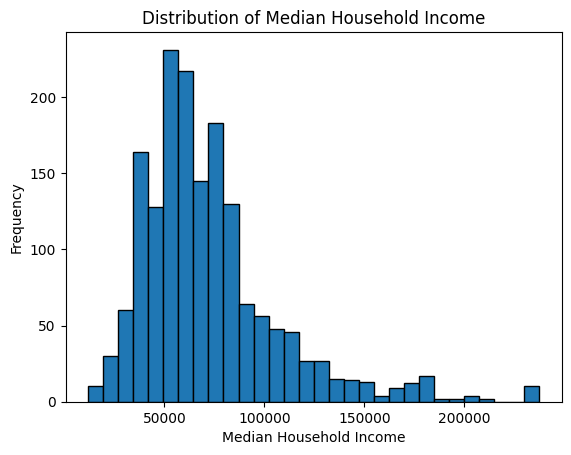

In [195]:
import matplotlib.pyplot as plt

plt.hist(df_analysis["MEDIAN_HOUSEHOLD_INCOME_AREA"].dropna(), bins=30, edgecolor="black")
plt.xlabel("Median Household Income")
plt.ylabel("Frequency")
plt.title("Distribution of Median Household Income")
plt.show()


In [197]:
df_analysis.nlargest(10, "MEDIAN_HOUSEHOLD_INCOME_AREA")


,DISTRICT_NUMBER,DISTRICT,CAMPUS_NUMBER,CAMPUS,REGION,COUNTY,SCHOOL_TYPE,GRADES_SERVED,CHARTER,URBANICITY,...,RACE_ASIAN,RACE_BLACK_OR_AFRICAN_AMERICAN,RACE_HISPANIC/LATINO,RACE_NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER,RACE_TWO_OR_MORE_RACES,RACE_WHITE,TEACHERS_COUNT,LAT,LONG,MEDIAN_HOUSEHOLD_INCOME_AREA
4633,79907,FORT BEND ISD,79907004.0,CLEMENTS H S,REGION 04: HOUSTON,FORT BEND,High School,09 - 12,No,Urban,...,2794.0,382.0,666.0,0.0,224.0,1046.0,136.88,29.57703,-95.63013,237455.0
478,15901,ALAMO HEIGHTS ISD,15901002.0,BEXAR CO J J A E P,REGION 20: SAN ANTONIO,BEXAR,High School,08 - 11,No,Suburban,...,0.0,0.0,4.0,0.0,0.0,0.0,NaN,29.49243,-98.46752,230521.0
488,15901,ALAMO HEIGHTS ISD,15901101.0,CAMBRIDGE EL,REGION 20: SAN ANTONIO,BEXAR,Elementary,01 - 05,No,Suburban,...,46.0,36.0,648.0,2.0,56.0,752.0,63.44,29.48035,-98.46721,230521.0
496,15904,HARLANDALE ISD,15904007.0,BEXAR CO J J A E P,REGION 20: SAN ANTONIO,BEXAR,High School,07 - 11,No,Suburban,...,0.0,0.0,24.0,0.0,0.0,0.0,NaN,29.49243,-98.46752,230521.0
531,15905,EDGEWOOD ISD,15905010.0,BEXAR CO J J A E P,REGION 20: SAN ANTONIO,BEXAR,High School,07 - 12,No,Suburban,...,0.0,0.0,40.0,0.0,0.0,0.0,NaN,29.49243,-98.46752,230521.0
728,15908,SOUTH SAN ANTONIO ISD,15908037.0,BEXAR CO J J A E P,REGION 20: SAN ANTONIO,BEXAR,High School,07 - 11,No,Suburban,...,0.0,0.0,8.0,0.0,0.0,0.0,NaN,29.49243,-98.46752,230521.0
855,15911,EAST CENTRAL ISD,15911004.0,BEXAR CO J J A E P,REGION 20: SAN ANTONIO,BEXAR,High School,09 - 10,No,Suburban,...,0.0,0.0,4.0,0.0,0.0,0.0,NaN,29.49243,-98.46752,230521.0
880,15912,SOUTHWEST ISD,15912003.0,BEXAR CO J J A E P,REGION 20: SAN ANTONIO,BEXAR,High School,10 - 10,No,Suburban,...,0.0,0.0,4.0,0.0,0.0,0.0,NaN,29.49243,-98.46752,230521.0
1049,15916,JUDSON ISD,15916006.0,BEXAR CO J J A E P,REGION 20: SAN ANTONIO,BEXAR,High School,09 - 11,No,Suburban,...,0.0,2.0,4.0,0.0,0.0,0.0,NaN,29.49243,-98.46752,230521.0
1093,15917,SOUTHSIDE ISD,15917003.0,BEXAR CO J J A E P,REGION 20: SAN ANTONIO,BEXAR,High School,09 - 10,No,Suburban,...,0.0,0.0,4.0,0.0,0.0,0.0,NaN,29.49243,-98.46752,230521.0
